<a href="https://colab.research.google.com/github/sr606/Machine_Learning_CaseStudies/blob/main/Store_Item_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Files/demand-forecasting-kernels-only/train.csv')

In [7]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [11]:
df.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [14]:
df.nunique()

,0
date,1826
store,10
item,50
sales,213


In [15]:
df.isnull().sum()

,0
date,0
store,0
item,0
sales,0


In [16]:
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Date range: {min_date} to {max_date}")

Date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00


In [17]:
print('Minimun Sales:', df['sales'].min())
print('Maximum Sales', df['sales'].max())
print('Average Sales', df['sales'].mean())


Minimun Sales: 0
Maximum Sales 231
Average Sales 52.250286966046005


Goals:

Identify sales trends (upward/downward/seasonal).

Spot high-demand stores/items.

Detect anomalies (sudden spikes or drops).

In [24]:
item_date_range = df.groupby('item')['date'].agg(['min','max']).reset_index()
item_date_range.columns = ['item','min_date','max_date']
print("\nDate range per item:")
print(item_date_range)


Date range per item:
    item   min_date   max_date
0      1 2013-01-01 2017-12-31
1      2 2013-01-01 2017-12-31
2      3 2013-01-01 2017-12-31
3      4 2013-01-01 2017-12-31
4      5 2013-01-01 2017-12-31
5      6 2013-01-01 2017-12-31
6      7 2013-01-01 2017-12-31
7      8 2013-01-01 2017-12-31
8      9 2013-01-01 2017-12-31
9     10 2013-01-01 2017-12-31
10    11 2013-01-01 2017-12-31
11    12 2013-01-01 2017-12-31
12    13 2013-01-01 2017-12-31
13    14 2013-01-01 2017-12-31
14    15 2013-01-01 2017-12-31
15    16 2013-01-01 2017-12-31
16    17 2013-01-01 2017-12-31
17    18 2013-01-01 2017-12-31
18    19 2013-01-01 2017-12-31
19    20 2013-01-01 2017-12-31
20    21 2013-01-01 2017-12-31
21    22 2013-01-01 2017-12-31
22    23 2013-01-01 2017-12-31
23    24 2013-01-01 2017-12-31
24    25 2013-01-01 2017-12-31
25    26 2013-01-01 2017-12-31
26    27 2013-01-01 2017-12-31
27    28 2013-01-01 2017-12-31
28    29 2013-01-01 2017-12-31
29    30 2013-01-01 2017-12-31
30    31 2013-01-

In [28]:
df = df.groupby('date')['sales'].sum().reset_index()
df

,date,sales
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237
...,...,...
1821,2017-12-27,20378
1822,2017-12-28,21885
1823,2017-12-29,23535
1824,2017-12-30,24988


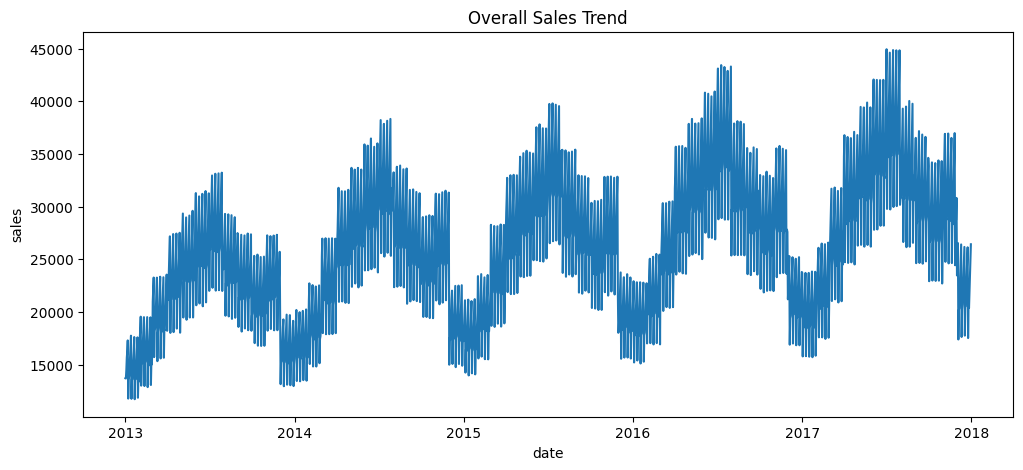

In [29]:
plt.figure(figsize=(12,5))
plt.plot(df['date'],df['sales'])
plt.title("Overall Sales Trend")
plt.xlabel("date")
plt.ylabel("sales")
plt.show()

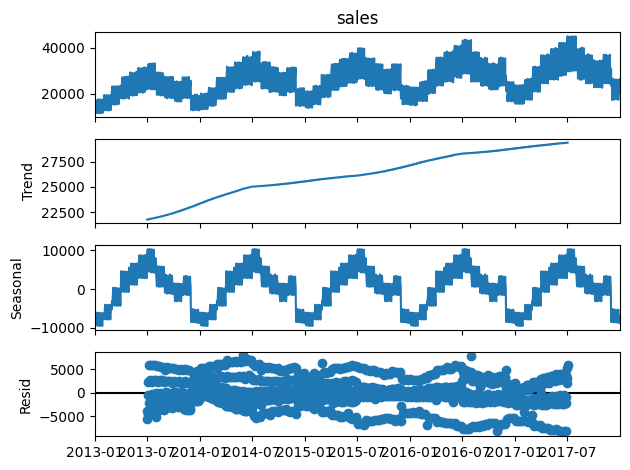

In [31]:
df.set_index('date', inplace = True)
decomposition = seasonal_decompose(df['sales'], model = 'additive', period = 365)
decomposition.plot()
plt.show()